## First attacker

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1073.24draws/s]


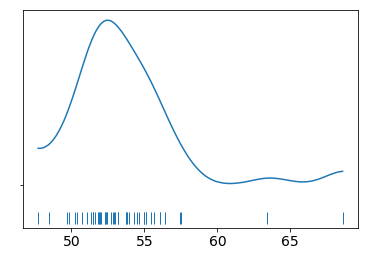

In [3]:
%matplotlib inline
import pymc3 as pm
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

def alpha(nameAgeList):
    ageMap = map(lambda args: (args[1], 1), nameAgeList)
    addedAgeTuple = reduce(lambda x, y: (x[0] + y[0], x[1] + y[1]),
                           ageMap)  # In Python 2, the map() built-in function returns an iterator https://thepythonguru.com/python-builtin-functions/map/
    # In Python 2, the map()  function returns a list instead of an iterator (which is not very efficient in terms of memory consumption), so we don’t need to wrap map()  in a list()  call.
    averageAge = addedAgeTuple[0] / addedAgeTuple[1]
    return averageAge

data = np.loadtxt('../data/age_shifts.csv')
az.plot_kde(data, rug=True)
plt.yticks([0], alpha=0)
plt.savefig('age_shifts.png', dpi=300)    
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data)
    trace_g = pm.sample(1000)
    
    az.plot_trace(trace_g)
    plt.savefig('B11197_02_09.png', dpi=300)
    #%%
    az.plot_joint(trace_g, kind='kde', fill_last=False)
    plt.savefig('B11197_02_10.png', dpi=300)
    #%%
    az.summary(trace_g)
    #%%
    y_pred_g = pm.sample_posterior_predictive(trace_g, 100, model_g)
    #%%
    data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
    ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)
    ax[0].legend(fontsize=15)
    plt.savefig('age_shifts_posterior.png', dpi=300)


 <img src="age_shifts.png" width="500">

 <img src="age_shifts_posterior.png" width="500">